<a href="https://colab.research.google.com/github/Abhedya19/ML-AND-ANN/blob/master/Internship_project_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

Personal loans are a major revenue generating mechanism for banks and all banks reach out to potential customers to campaign for their loan offerings. Most of these campaigns reach out to a random database of customers and hence end up into annoying tele-marketing calls than being efficient means for lead conversion.
In this project, we will see how we could harness the power of machine learning to target the campaigns towards the right set of customers, thereby increasing conversion propensity. We will be using past data available on the demography, bank details, and transaction patterns of customers who have responded and not responded to a personal loan campaign, as training data to predict the probability if a customer will respond to the campaign.

**In machine learning terminology, this is a classification problem and there are several classification algorithms available to build a prediction model out of which we will be using Logistic regression.**

**About Logistic Regression**

Logistic Regression is a popular and powerful supervised machine learning technique used to build a model relating the independent predictors (x variable) with the response variable (y) that is categorical in nature. Where the class is known already, it can help find factors distinguishing between records in different classes in terms of the predictor variables in the dataset.
When the outcome variable has just two classes (Eg: Pass/Fail; Fraudulent/Not Fraudulent; Default/No Default) binomial logistic regression is applied and multinomial logistic regression is applied if we have more than two classes (Eg: Buy/Sell/Hold).
Logistic regression is a statistical technique and provides a detailed statistical summary in terms of statistical significance of the predictor variables and how each predictor variable impacts the probability of the classes of the Y variable. These unique qualities make this algorithm highly relevant to the Banking & Finance domain to provide detailed and numerical interpretation of the predictor variables.

**Dataset**

We have a dataset that provides details from a bank about a ‘Personal Loan’ campaign that was executed by the bank. 20,000 customers were targeted with an offer of personal loan at 14% interest rate, out of which 2512 customers responded positively. The dataset and the data dictionary can be downloaded
here(​https://www.kaggle.com/itsmesunil/bank-loan-modelling/download) 

Step 1:Importing all required libraries,uploading,reading and displaying data from the file and performing Exploratory Data Analysis on it.
  

In [ ]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #Graphical representation of data and model fitting
import seaborn as sns #Graphical representation of data and model fitting



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Reading file and displaying data
customer_info=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx",sheet_name='Data')  #reading the data in the excel sheet as a pandas Dataframe
print(customer_info)







        ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]


In [ ]:
#Renaming columns whose names have blank spaces
customer_info.rename(columns={'Personal Loan':'Personal_Loan','Securities Account':'Securities_Account',
                      'CD Account':'CD_Account','ZIP Code':'ZIP_Code'},inplace=True)
print(customer_info)

        ID  Age  Experience  ...  CD_Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]


In [ ]:
#description of the dataframe
customer_info.info()    #displaying number of rows and columns,name and datatype of each column 
                        #and total memory space occupied by dataframe 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
#statistical analysis of each column
customer_info.describe()  # mean,standard deviation,interquartile range and range of values in each column  


,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


STEP 2:Checking if the data requires cleaning and finding correlation between different feature variables

In [ ]:
#Checking for null values in DataFrame
customer_info.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
#checking for negative values
y=(customer_info<0).all(1)
print(y)

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool


From the result provided above , it is clear that no column has any null values . Thus,data imputation is not required.

In [ ]:
#Checking for correlation using a correlation matrix
CorrMatrix=customer_info.corr()
print(CorrMatrix)


                          ID       Age  ...    Online  CreditCard
ID                  1.000000 -0.008473  ... -0.002528    0.017028
Age                -0.008473  1.000000  ...  0.013702    0.007681
Experience         -0.008326  0.994215  ...  0.013898    0.008967
Income             -0.017695 -0.055269  ...  0.014206   -0.002385
ZIP_Code            0.013432 -0.029216  ...  0.016990    0.007691
Family             -0.016797 -0.046418  ...  0.010354    0.011588
CCAvg              -0.024672 -0.052030  ... -0.003620   -0.006686
Education           0.021463  0.041334  ... -0.015004   -0.011014
Mortgage           -0.013920 -0.012539  ... -0.005995   -0.007231
Personal_Loan      -0.024801 -0.007726  ...  0.006278    0.002802
Securities_Account -0.016972 -0.000436  ...  0.012627   -0.015028
CD_Account         -0.006909  0.008043  ...  0.175880    0.278644
Online             -0.002528  0.013702  ...  1.000000    0.004210
CreditCard          0.017028  0.007681  ...  0.004210    1.000000

[14 rows 

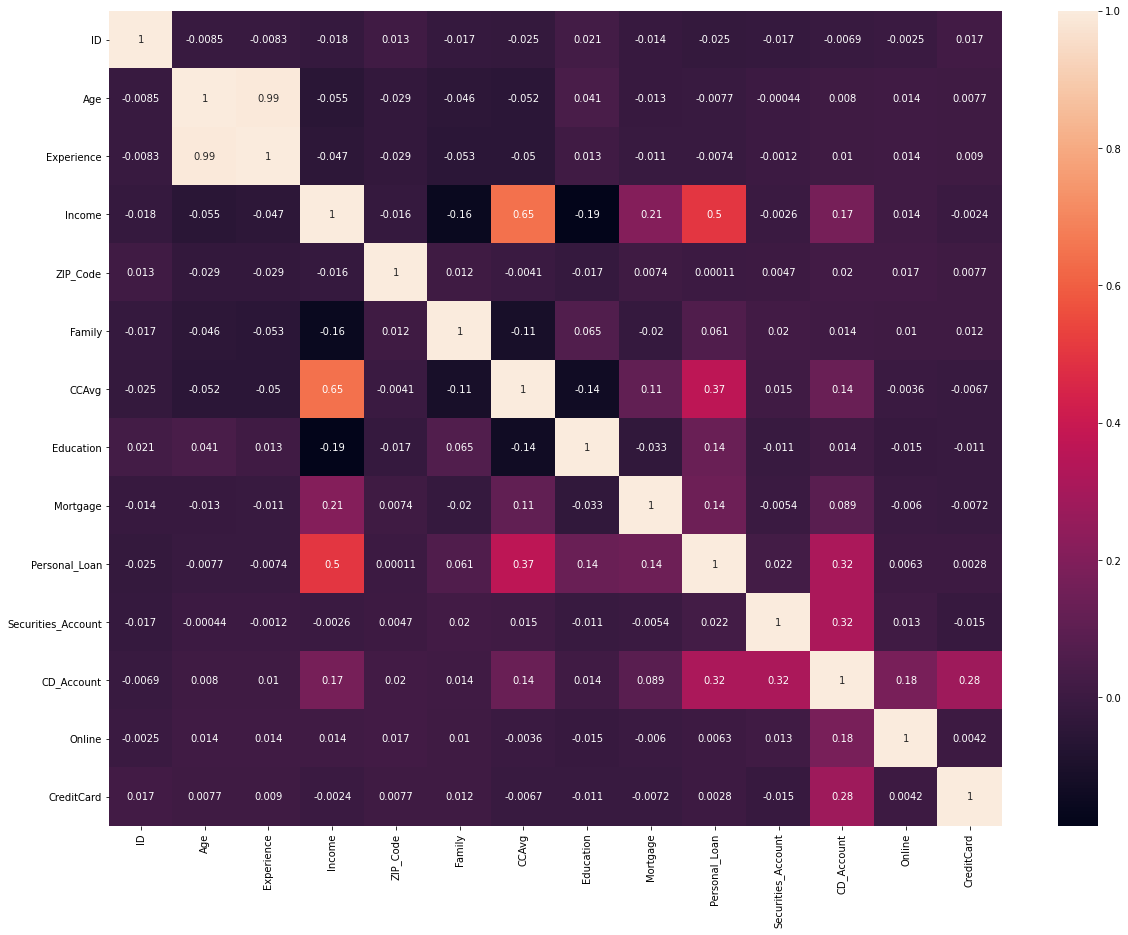

In [ ]:
#visualisation of the correlation matrix using a heatmap
plt.figure(figsize=(20,15))
ax=sns.heatmap(CorrMatrix,annot=True)



After looking at the heat map,we see that Experience and Age have a very high correlation of 0.99.So we decide to not include the Experience Column for the model. 
Income has a high correlation of 0.65 with CCAvg and 0.5 with Personal_Loan. Thus we wont be including Income in our model as well.

Step 3:To study the data distribution of each feature variable and target variable 

In [ ]:
#Value counts of Each categorical column
#value count of Family
customer_info.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
#value count of Education
customer_info.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
#value count of Securities_Account
customer_info.Securities_Account.value_counts()

0    4478
1     522
Name: Securities_Account, dtype: int64

In [ ]:
#value count of CD_Account
customer_info.CD_Account.value_counts()


0    4698
1     302
Name: CD_Account, dtype: int64

In [ ]:
#value count of CreditCard
customer_info.CreditCard.value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
#value count of Online
customer_info.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
#Number of uniques in each column
customer_info.nunique()             


ID                    5000
Age                     45
Experience              47
Income                 162
ZIP_Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal_Loan            2
Securities_Account       2
CD_Account               2
Online                   2
CreditCard               2
dtype: int64

In [ ]:
#Number of people with zero mortgage
zeromortgage=(customer_info.Mortgage==0).sum()
print(zeromortgage)

3462


In [ ]:
#Number of people having zero spendings on credit cards per month
zerospending=(customer_info.CCAvg==0).sum()
print(zerospending)

106


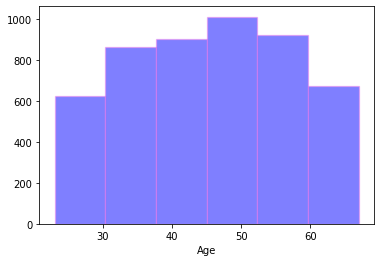

In [ ]:
#Univariate Analysis
#distribution of important independent variables
#histogram showing distribution of age
x=customer_info['Age']
plt.hist(x,bins=6,color='blue',alpha=0.5,edgecolor='violet',linewidth=1.3)
plt.xlabel('Age')
plt.show() 



From the above histogram it is clear that the maximum number of people are from 45-53 years of age and that the bank has a customer base in every age group-from young adults to people above 60



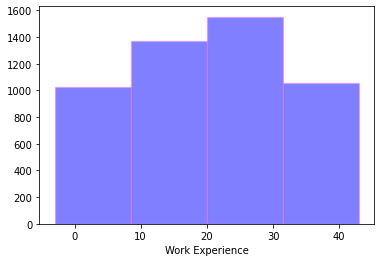

In [ ]:
#histogram showing distribution of work experience
x=customer_info['Experience']
plt.hist(x,bins=4,color='blue',alpha=0.5,edgecolor='violet',linewidth=1.3)
plt.xlabel('Work Experience')
plt.show() 

From above distribution we can conclude that most people have 20-28 years of professional work experience and that the bank has customers who are new to the professional working arena as well as well established working professionals .

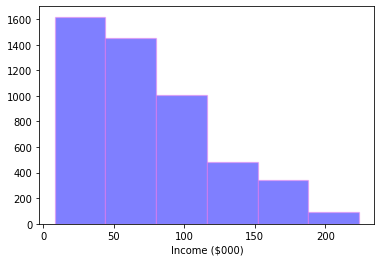

In [ ]:
#histogram showing distribution of income
x=customer_info['Income']
plt.hist(x,bins=6,color='blue',alpha=0.5,edgecolor='violet',linewidth=1.3)
plt.xlabel('Income ($000)')
plt.show() 


From above distribution , it is clear that most of the people have income between $10,000-40,000.

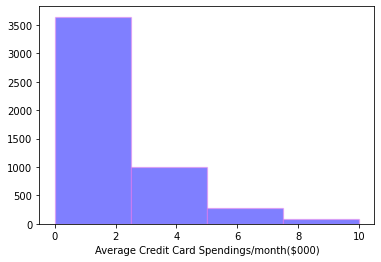

In [ ]:
#histogram showing distribution of average credit card spending per month
x=customer_info['CCAvg']
plt.hist(x,bins=4,color='blue',alpha=0.5,edgecolor='violet',linewidth=1.3)
plt.xlabel('Average Credit Card Spendings/month($000)')
plt.show() 


From above distribution , it is clear that more than 70% people spend less than $2200 per month


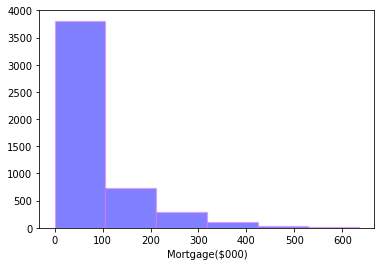

In [ ]:
#histogram to show distribution of mortgage
x=customer_info['Mortgage']
plt.hist(x,bins=6,color='blue',alpha=0.5,edgecolor='violet',linewidth=1.3)
plt.xlabel('Mortgage($000)')
plt.show() 


Out of those who have mortgages,about 75% people have mortgages of less than $100,000

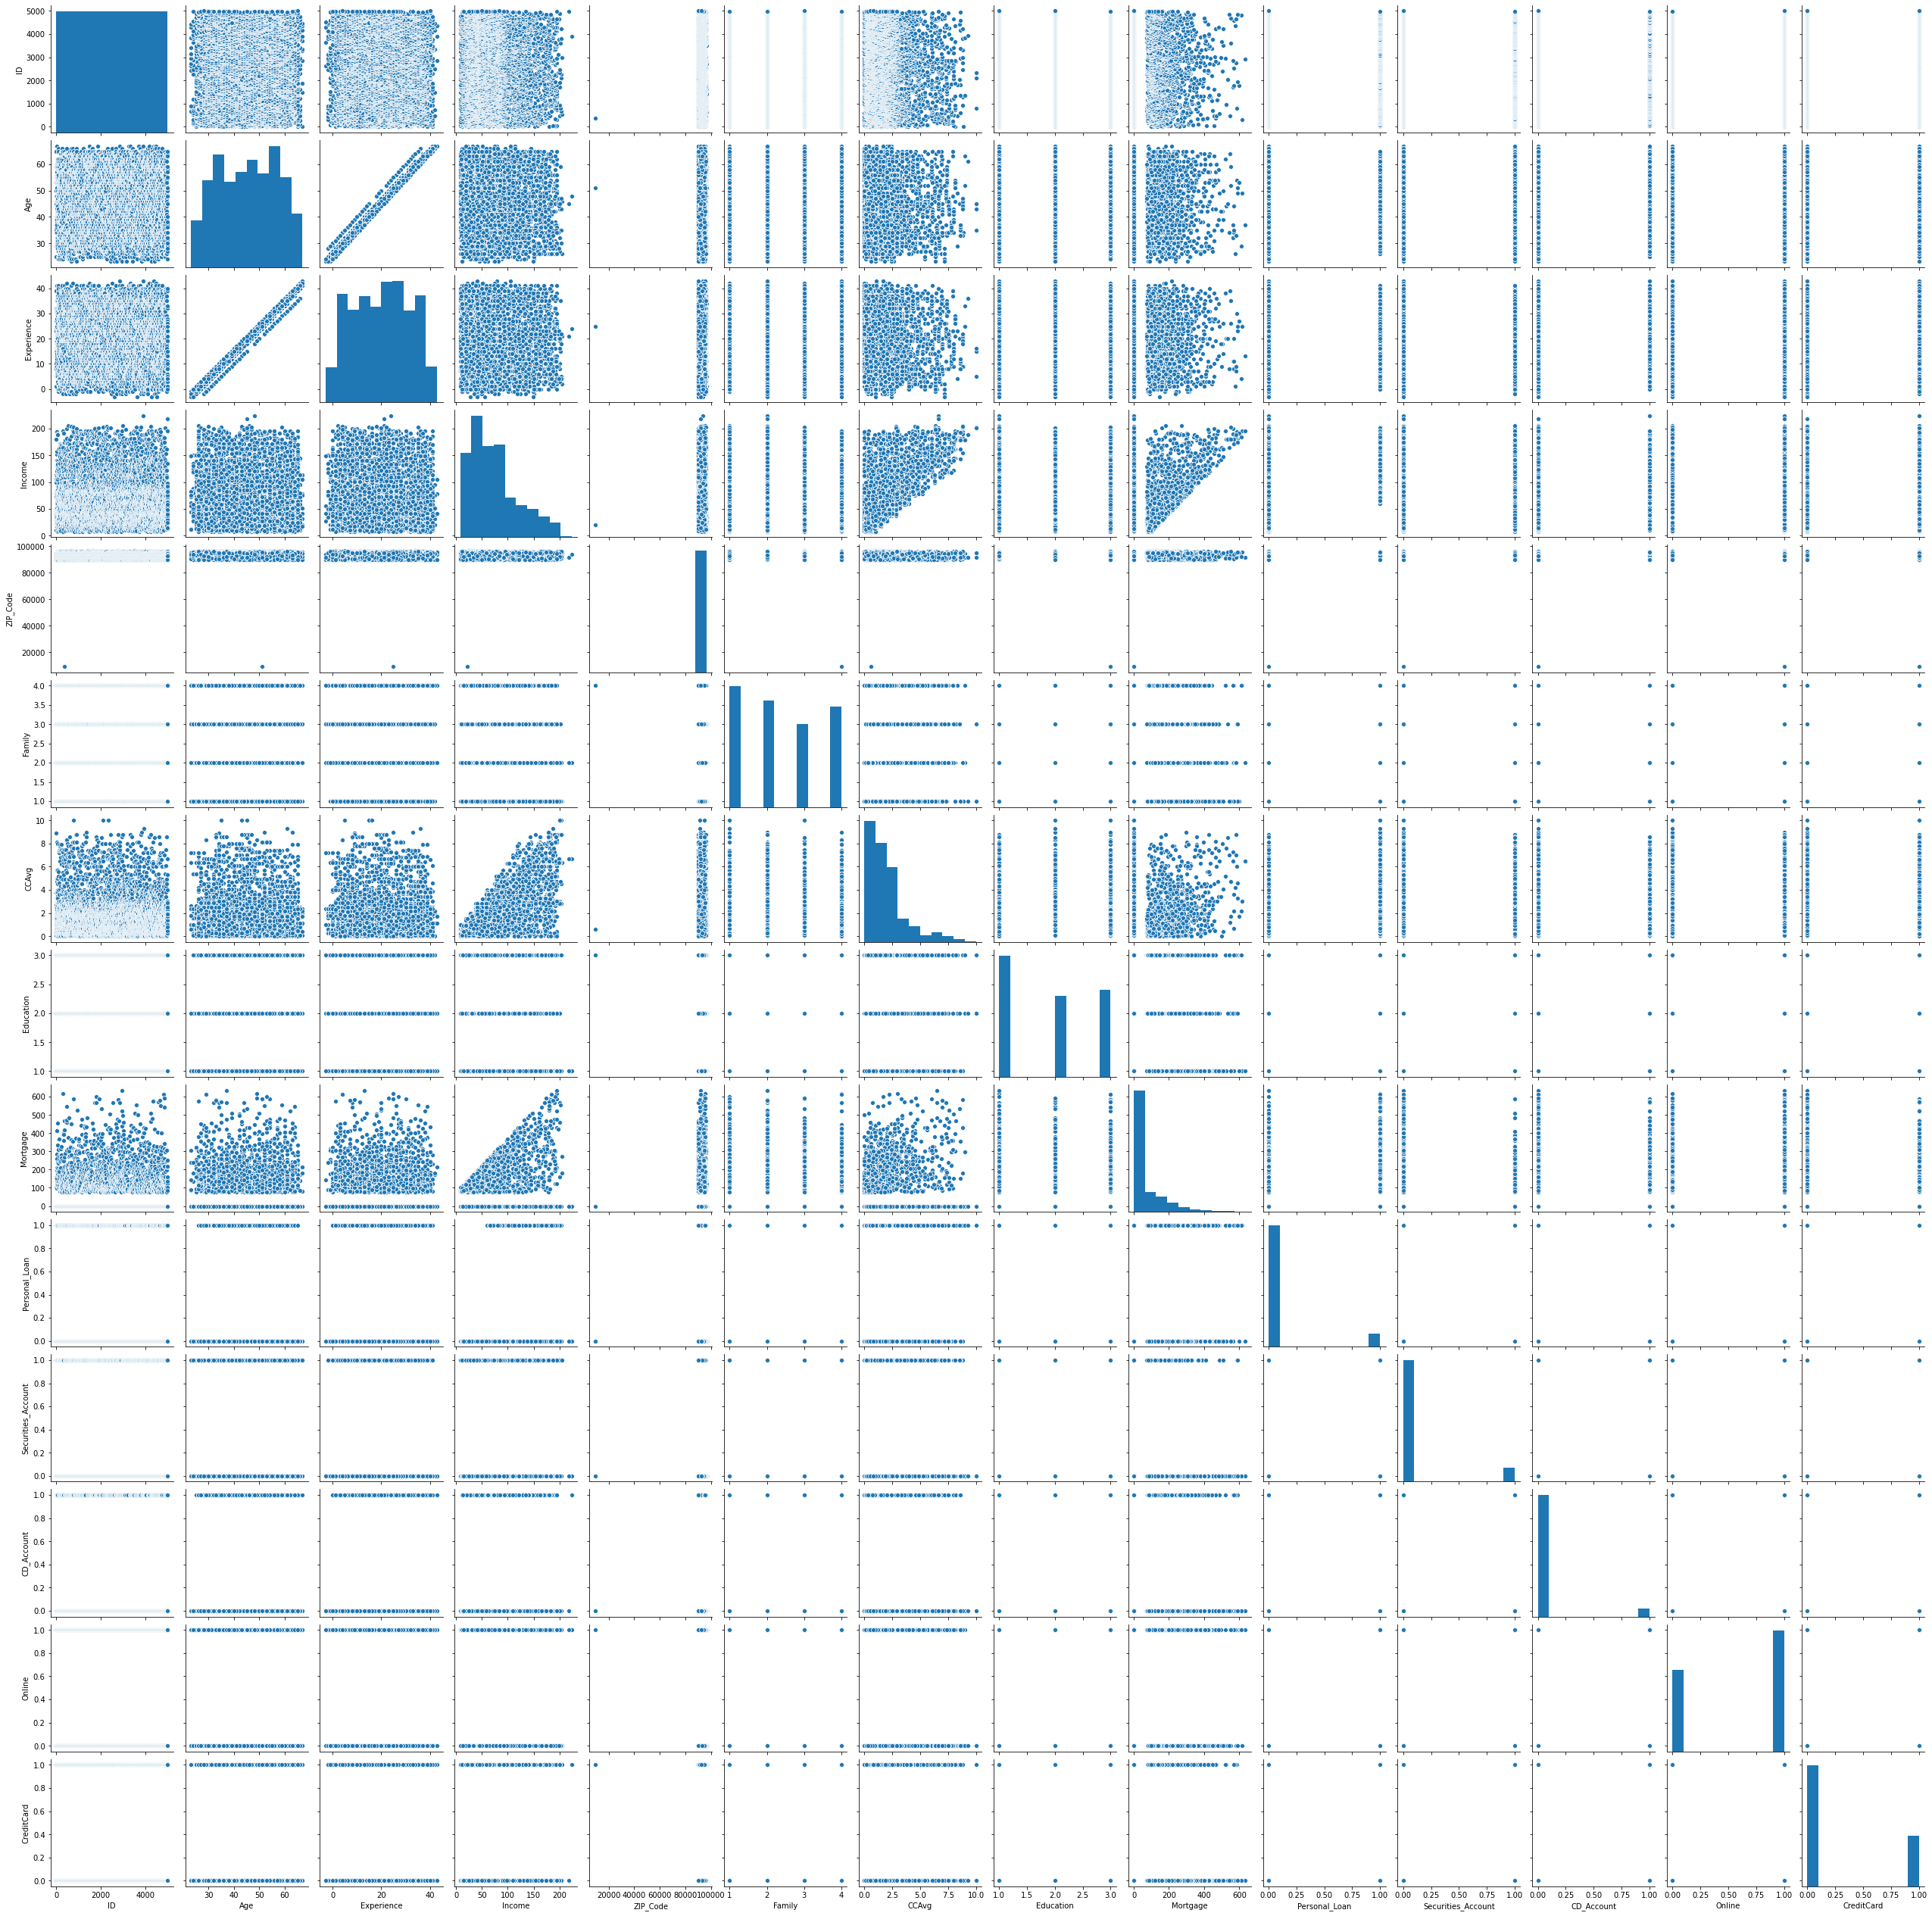

In [ ]:
#bivariate analysis
sns.pairplot(customer_info)

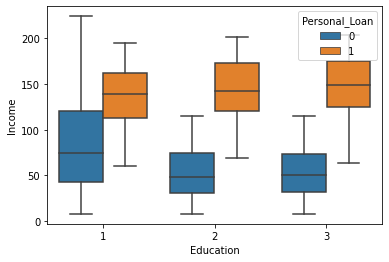

In [ ]:
sns.boxplot(x='Education',y='Income',hue='Personal_Loan',data=customer_info)

We can see that personal loan has been granted to people having high income across all the educational background categories.

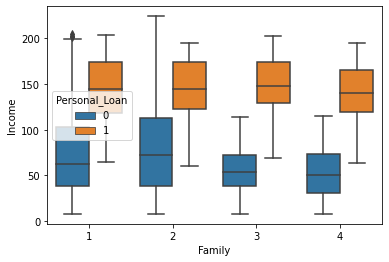

In [ ]:
sns.boxplot(y='Income',x='Family',data=customer_info,hue='Personal_Loan')

It can be seen that Family size also does not play a role in acceptance of a personal loan application if the income is high.

Step 4:Applying necessary data transformations

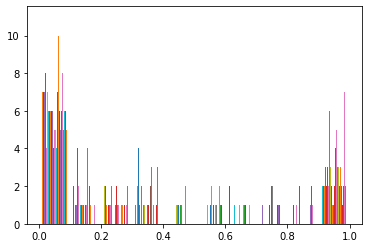

In [ ]:
#applying minmax scaling to the entire dataset
from sklearn.preprocessing import MinMaxScaler
data=customer_info.values
trans=MinMaxScaler()
data=trans.fit_transform(data)
data=pd.DataFrame(data)
plt.hist(data)
plt.show()


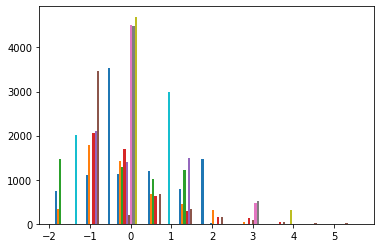

In [ ]:
#from sklearn.preprocessing import StandardScaler
#data=customer_info.values
#trans = StandardScaler()
#data = trans.fit_transform(data)
#dataset =pd.DataFrame(data)
#plt.hist(data)
#plt.show()

From above two scaling techniques,it is visible that minmaxscaler is a better method for this dataset as it gives a better normal distribution to the data 

Step 5:Splitting the Dataset and applying the Logistic Regression Model on it

In [ ]:
#Dropping columns that we have decided not to use
customer_info.drop(['ID','ZIP_Code','Experience','Income'],axis=1,inplace=True)
#not including ID and ZIP_Code as they are irrelevant and Income and Experience as they have high correlations with other feature variables
customer_info

,Age,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,4,1.6,1,0,0,1,0,0,0
1,45,3,1.5,1,0,0,1,0,0,0
2,39,1,1.0,1,0,0,0,0,0,0
3,35,1,2.7,2,0,0,0,0,0,0
4,35,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4995,29,1,1.9,3,0,0,0,0,1,0
4996,30,4,0.4,1,85,0,0,0,1,0
4997,63,2,0.3,3,0,0,0,0,0,0
4998,65,3,0.5,2,0,0,0,0,1,0


In [ ]:
#splitting the dataset using Stratified Sampling
from sklearn.model_selection import train_test_split
X=customer_info.loc[:,customer_info.columns!='Personal_Loan']
Y=customer_info['Personal_Loan']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,stratify=Y,random_state=0)
#we split the data using stratified sampling as only 9.6% of the people opted for personal loan in the previous campaign i.e. the dataset is imbalanced


In [ ]:
#applying the model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logistic_regression=LogisticRegression()
logistic_regression.fit(X_train,Y_train)
Y_predtrain=logistic_regression.predict(X_train)
Y_predtest=logistic_regression.predict(X_test)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Step 6:Metric Evaluation of the performance of the model

In [ ]:
#checking accuracy for training set 
print('Accuracy for training set:',metrics.accuracy_score(Y_train,Y_predtrain))


Accuracy for training set: 0.926


In [ ]:
#checking accuracy for training set
print('Accuracy for test set:',metrics.accuracy_score(Y_test,Y_predtest))

Accuracy for test set: 0.924


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
result=confusion_matrix(Y_test,Y_predtest)
print("confusion matrix:")
print(result)

confusion matrix:
[[1323   33]
 [  46   98]]


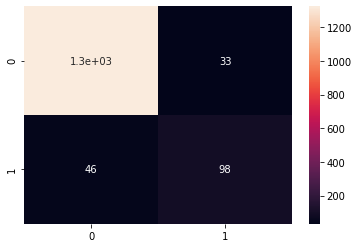

In [ ]:
#visualisation of the confusion matrix
sns.heatmap(result, annot=True)
plt.show()

In [ ]:
result1=classification_report(Y_test,Y_predtest)
print("classification report:",result1)

classification report:               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1356
           1       0.70      0.37      0.48       144

    accuracy                           0.92      1500
   macro avg       0.82      0.68      0.72      1500
weighted avg       0.91      0.92      0.91      1500



In [ ]:
#finding out the logistic summary of our model
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Personal_Loan   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     201.1
Date:                Thu, 03 Sep 2020   Prob (F-statistic):               0.00
Time:                        15:13:05   Log-Likelihood:                -210.06
No. Observations:                5000   AIC:                             440.1
Df Residuals:                    4990   BIC:                             505.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.1929      0

In [ ]:
#finding out the theoretical and true odd ratios of the individual coefficients
logit=sm.Logit(Y,X)
result=logit.fit()
print(np.exp(result.params))
params= result.params
conf=result.conf_int()
conf["OR"]=params
conf.columns=["2.5%","97.5%","OR"]
print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.249506
         Iterations 8
Age                    0.932027
Family                 0.909326
CCAvg                  1.490303
Education              1.343155
Mortgage               1.001449
Securities_Account     0.229694
CD_Account            61.369123
Online                 0.388756
CreditCard             0.244046
dtype: float64
                         2.5%      97.5%         OR
Age                  0.925202   0.938902   0.932027
Family               0.835617   0.989535   0.909326
CCAvg                1.419501   1.564637   1.490303
Education            1.197443   1.506598   1.343155
Mortgage             1.000595   1.002305   1.001449
Securities_Account   0.150604   0.350318   0.229694
CD_Account          39.369387  95.662380  61.369123
Online               0.312604   0.483458   0.388756
CreditCard           0.178461   0.333735   0.244046


**Some Conclusions based on ODD RATIOS**

1)If the person has a mortgage,the odds that he opts for a personal loan increases 1.4 folds.
2)If the customer has a Certificate of Deposit Account with the bank,the odds of him opting for a personal increase 1.3 folds.

Step 7:Applying the decision tree and random forest models and comparing with them

In [ ]:
#Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)
Y_predtrain=model.predict(X_train)
Y_predtest=model.predict(X_test)

In [ ]:
#checking accuracy for training set 
print('Accuracy for training set:',metrics.accuracy_score(Y_train,Y_predtrain))

Accuracy for training set: 0.9997142857142857


In [ ]:
#checking accuracy for training set
print('Accuracy for test set:',metrics.accuracy_score(Y_test,Y_predtest))

Accuracy for test set: 0.9473333333333334


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
result=confusion_matrix(Y_test,Y_predtest)
print("confusion matrix:")
print(result)

confusion matrix:
[[1323   33]
 [  46   98]]


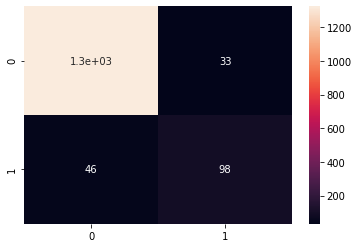

In [ ]:
#visualisation of the confusion matrix
sns.heatmap(result, annot=True)
plt.show()

In [ ]:
result1=classification_report(Y_test,Y_predtest)
print("classification report:",result1)

classification report:               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1356
           1       0.75      0.68      0.71       144

    accuracy                           0.95      1500
   macro avg       0.86      0.83      0.84      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=50)
model.fit(X_train,Y_train)
Y_predtrain=model.predict(X_train)
Y_predtest=model.predict(X_test)


In [ ]:
#checking accuracy for training set 
print('Accuracy for training set:',metrics.accuracy_score(Y_train,Y_predtrain))

Accuracy for training set: 0.9994285714285714


In [ ]:
#checking accuracy for training set
print('Accuracy for test set:',metrics.accuracy_score(Y_test,Y_predtest))

Accuracy for test set: 0.9613333333333334


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
result=confusion_matrix(Y_test,Y_predtest)
print("confusion matrix:")
print(result)


confusion matrix:
[[1352    4]
 [  54   90]]


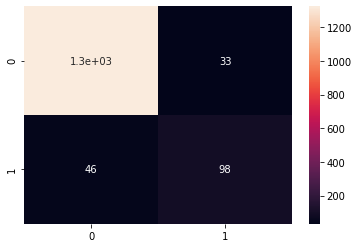

In [ ]:
#visualisation of the confusion matrix
sns.heatmap(result, annot=True)
plt.show()

In [ ]:
result1=classification_report(Y_test,Y_predtest)
print("classification report:",result1)

classification report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.96      0.62      0.76       144

    accuracy                           0.96      1500
   macro avg       0.96      0.81      0.87      1500
weighted avg       0.96      0.96      0.96      1500



Out of all the three models , we see that the logistic regression model has the least accuracy for both training as well as test sets and the random forest model has the highest accuracy for both since it is an ensemble algorithm which takes into account the results of many classifiers and gives the best results.But accuracy is not a good measure.

Sensitivity is more important than accuracy here as we are more interested in knowing all those records where a customer will respond to a new campaign rather than those records where a customer may not respond at all.**Based on sensitivity,Random Forest turns out to be the best model for prediction,followed by Decision Tree and then Logistic Regression**.The lost opportunity cost in contacting a potential customer, who would avail a loan and thereby pay interest to the bank, due to incorrect classification by the model (sensitivity) is more critical than potentially non-responding customers receiving mailers or calls due to incorrect classification (specificity).
When we compare the model performance measures between the train and test data , the model holds good for the test data without a significant drop in performance measures. This indicates that there is no overfit in the model.
For predicting the class with this model, we have consciously compromised on accuracy to have a better sensitivity i.e. not to lose out on potential customers who will respond to the loan campaign.

**ACTIONABLE INSIGHT BASED ON LOGISTIC REGRESSION MODEL**

1)The bank,instead of cold-calling everyone,should target people having a certificate of deposit account or mortgage or both as their odds of going for a personal loan are very high.



**CONCLUSION**

Here, we have used Binomial Logistic Regression technique not only to predict the class of customers responding to the loan campaign but also get a list of statistically significant independent variables that influence the customer response to the campaign. We are also able to predict the probability of a customer responding or not responding based on the model summary. These give powerful insights which will help in improving the response rate from the customers and thereby conversion to availing loans with the bank.